In [1]:
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from psd_tools import PSDImage
from PIL import Image


# PSD to JPG

043-g4 : blank img


In [9]:
path2file = '/home/yec23006/projects/research/oc/psdimage/06-3 ng R+L654 0.01/H6 stack.psd'
path2save = '/home/yec23006/projects/research/oc/image/063_h6/'
psd = PSDImage.open(path2file)
psd.composite().save('/home/yec23006/projects/research/oc/image/063_h6/063_h6.jpg')

for layer in psd:
    print(layer)
    layer_image = layer.composite()
    layer_image = layer_image.convert('RGB')
    layer_image.save(path2save + '%s' % layer.name)

Unknown image resource 1092


PixelLayer('H6 FITC-Phall.jpg' size=4096x4096)
PixelLayer('H6 ELF97.jpg' size=4096x4096)
PixelLayer('H6 Cy5-Nu.jpg' size=4096x4096 invisible)


# PSD to PNG (higher resolution)

In [1]:
from PIL import Image
from psd_tools import PSDImage
import subprocess
import os

In [10]:

# Step 2: Import Required Libraries
import os
import subprocess

# Step 3: Function to Extract and Save Each Layer of a PSD as a PNG using ImageMagick
def convert_psd_layers_to_png(psd_path, output_dir):
    # Ensure the output directory exists
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # Use ImageMagick to identify the layers
    identify_command = ['convert', psd_path, '-format', '%[label]\n', 'info:']
    result = subprocess.run(identify_command, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
    
    if result.returncode != 0:
        print(f"Error identifying layers: {result.stderr}")
        return
    
    layers = result.stdout.splitlines()
    layer_count = len(layers)
    
    # Extract and save each layer as a PNG
    for i in range(layer_count):
        layer_name = layers[i].replace('/', '_').replace('\\', '_').replace('.jpg', '.png')
        if layer_name == '':
            layer_name = 'merged.png'
        layer_path = os.path.join(output_dir, f"{layer_name}")
        
        # Use ImageMagick to convert each layer to PNG
        convert_command = ['convert', f"{psd_path}[{i}]", layer_path]
        subprocess.run(convert_command)
        
        print(f"Saved layer '{layer_name}' as '{layer_path}'")

# Step 4: Usage Example
# Define paths
psd_path = '/home/yec23006/projects/research/oc/psdimage/01-3 ng RANKL no Lipid/F1 stack.psd'
output_dir = '/home/yec23006/projects/research/oc/pngimage/013_f1'

# Convert PSD layers to PNG
convert_psd_layers_to_png(psd_path, output_dir)


Saved layer 'merged.png' as '/home/yec23006/projects/research/oc/pngimage/013_f1/merged.png'
Saved layer 'F1-FITC-Phall.png' as '/home/yec23006/projects/research/oc/pngimage/013_f1/F1-FITC-Phall.png'
Saved layer 'F1-ELF97.png' as '/home/yec23006/projects/research/oc/pngimage/013_f1/F1-ELF97.png'
Saved layer 'F1-Cy5-Nu.png' as '/home/yec23006/projects/research/oc/pngimage/013_f1/F1-Cy5-Nu.png'


In [12]:
# Check pdi

image = Image.open('/home/yec23006/projects/research/oc/pngimage/013_f1/F1-FITC-Phall.png')
dpi = image.info.get('dpi')  # Default to 72 DPI if not specified
print(f"DPI of the image: {dpi}")
print("Shape : ", np.array(image).shape)

DPI of the image: (299.9994, 299.9994)
Shape :  (4096, 4096)


In [32]:
def detect_circle(image_path):
    
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)    
    
    # Use the HoughCircles function to detect circles in the image
    circles = cv2.HoughCircles(image, cv2.HOUGH_GRADIENT, dp=1.2, minDist=100, param1=100, param2=30, minRadius=0, maxRadius=0)
    
    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        for (x, y, r) in circles:
            return x, y, r
    return None

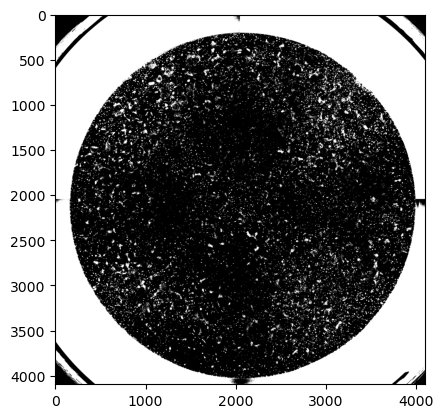

In [24]:
import cv2
image = cv2.imread('/home/yec23006/projects/research/oc/pngimage/013_f1/F1-ELF97.png', cv2.IMREAD_GRAYSCALE)
image = cv2.threshold(image,150,255,cv2.THRESH_BINARY)
plt.imshow(image[1], 'gray')
plt.show()

In [33]:
detect_circle('/home/yec23006/projects/research/oc/pngimage/013_f1/F1-ELF97.png')

(1984, 2113, 1359)

# Get sizes

In [2]:
# Function to get dimensions of an image
def get_image_dimensions(image_path):
    with Image.open(image_path) as img:
        width, height = img.size
    return width, height


In [4]:
listofimg = os.listdir('/home/yec23006/projects/research/oc/testimg')
imgindir = glob(os.path.join('/home/yec23006/projects/research/oc/testimg','*'))
for img in imgindir:
    print(img, get_image_dimensions(img))

/home/yec23006/projects/research/oc/testimg/G1 Ano_3ng RANKL_stack_adj_B.jpg (4096, 4096)
/home/yec23006/projects/research/oc/testimg/G1 Ano_3ng RANKL_stack_adj_A.jpg (4096, 4096)
/home/yec23006/projects/research/oc/testimg/G1 Ano_3ng RANKL_stack_adj_G.jpg (4096, 4096)
/home/yec23006/projects/research/oc/testimg/G1 Ano_3ng RANKL_stack_adj_Y.jpg (4096, 4096)


# Making Patches

In [14]:
import json

def generate_patches(patch_size, json_path):
    width = 4096
    height = 4096

    patches = []
    patch_id = 0

    for x in range(0, width, patch_size):
        for y in range(0, height, patch_size):
            if x + patch_size > width or y + patch_size > height:
                continue  # Skip patches that would exceed image boundaries
            
            x_right = x + patch_size
            y_low = y + patch_size
            y_up = y
            x_left = x

            # Save coordinates
            patch_info = {
                "patch_id": patch_id,
                "x_left": x_left,
                "x_right": x_right,
                "y_low": y_low,
                "y_up": y_up
            }
            patches.append(patch_info)
            patch_id += 1

    # Save coordinates to JSON
    with open(json_path, 'w') as json_file:
        json.dump(patches, json_file, indent=4)


# Example usage
patch_size = 128  # size of each patch (e.g., 256x256 pixels)
json_path = '/home/yec23006/projects/research/oc/testimg/patches_coordinates_128.json'
generate_patches(patch_size, json_path)

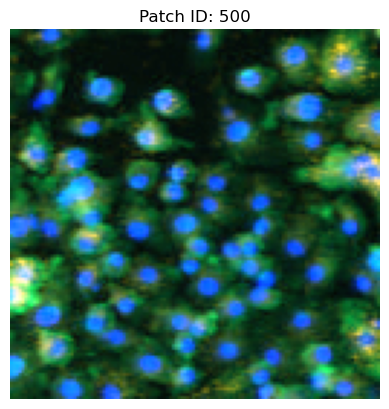

In [16]:
def visualize_patch(image_path, json_path, patch_id):
    image = Image.open(image_path)

    with open(json_path, 'r') as json_file:
        patches = json.load(json_file)

    # Find the patch with the specified patch_id
    patch_info = None
    for patch in patches:
        if patch['patch_id'] == patch_id:
            patch_info = patch
            break

    if patch_info is None:
        print(f"Patch with id {patch_id} not found.")
        return

    # Extract the coordinates
    x_left = patch_info['x_left']
    x_right = patch_info['x_right']
    y_up = patch_info['y_up']
    y_low = patch_info['y_low']

    # Crop the patch from the image
    patch = image.crop((x_left, y_up, x_right, y_low))

    # Display the patch
    plt.imshow(patch)
    plt.title(f'Patch ID: {patch_id}')
    plt.axis('off')
    plt.show()

# Example usage
image_path = '/home/yec23006/projects/research/oc/image/013_f1/013_f1.png'
json_path = '/home/yec23006/projects/research/oc/image/patches_coordinates_128.json'
patch_id = 500  # ID of the patch you want to visualize

visualize_patch(image_path, json_path, patch_id)


# Detect Slide area and Extract patches

Generated 701 patches and saved coordinates to /home/yec23006/projects/research/oc/image/patches_coordinates.json


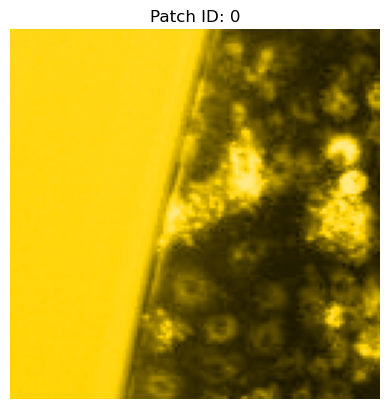

In [1]:
import cv2
import numpy as np
from PIL import Image
import json
import matplotlib.pyplot as plt

def detect_circle(image_path):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Apply GaussianBlur to reduce noise and improve edge detection
    blurred = cv2.GaussianBlur(image, (9, 9), 2)
    
    # Use the HoughCircles function to detect circles in the image
    circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1.2, minDist=100, param1=100, param2=30, minRadius=0, maxRadius=0)
    
    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        for (x, y, r) in circles:
            return x, y, r
    return None

def extract_patches(image_path, center, radius, patch_size, json_path):
    image = Image.open(image_path)
    width, height = image.size
    patches = []
    patch_id = 0

    x_center, y_center = center
    for x in range(x_center - radius, x_center + radius, patch_size):
        for y in range(y_center - radius, y_center + radius, patch_size):
            if x + patch_size > width or y + patch_size > height:
                continue  # Skip patches that would exceed image boundaries

            # Check if the center of the patch is within the circle
            x_mid = x + patch_size // 2
            y_mid = y + patch_size // 2
            if (x_mid - x_center) ** 2 + (y_mid - y_center) ** 2 > radius ** 2:
                continue  # Skip patches outside the circle

            x_right = x + patch_size
            y_low = y + patch_size
            y_up = y
            x_left = x

            # Save coordinates
            patch_info = {
                "patch_id": patch_id,
                "x_left": x_left,
                "x_right": x_right,
                "y_low": y_low,
                "y_up": y_up
            }
            patches.append(patch_info)
            patch_id += 1

    # Save coordinates to JSON
    with open(json_path, 'w') as json_file:
        json.dump(patches, json_file, indent=4)

    print(f"Generated {patch_id} patches and saved coordinates to {json_path}")

def visualize_patch(image_path, json_path, patch_id):
    # Load the image
    image = Image.open(image_path)

    # Load the JSON file
    with open(json_path, 'r') as json_file:
        patches = json.load(json_file)

    # Find the patch with the specified patch_id
    patch_info = None
    for patch in patches:
        if patch['patch_id'] == patch_id:
            patch_info = patch
            break

    if patch_info is None:
        print(f"Patch with id {patch_id} not found.")
        return

    # Extract the coordinates
    x_left = patch_info['x_left']
    x_right = patch_info['x_right']
    y_up = patch_info['y_up']
    y_low = patch_info['y_low']

    # Crop the patch from the image
    patch = image.crop((x_left, y_up, x_right, y_low))

    # Display the patch
    plt.imshow(patch)
    plt.title(f'Patch ID: {patch_id}')
    plt.axis('off')
    plt.show()

# Example usage
image_path = '/home/yec23006/projects/research/oc/testimg/G1 Ano_3ng RANKL_stack_adj_A.jpg'
image2elf = '/home/yec23006/projects/research/oc/testimg/G1 Ano_3ng RANKL_stack_adj_Y.jpg'
json_path = '/home/yec23006/projects/research/oc/image/patches_coordinates.json'
patch_size = 128  # size of each patch (e.g., 64x64 pixels)

center = detect_circle(image2elf)
if center is not None:
    x_center, y_center, radius = center
    extract_patches(image2elf, (x_center, y_center), radius, patch_size, json_path)
else:
    print("No circle detected.")

# To visualize a specific patch, use visualize_patch function
patch_id = 0  # ID of the patch you want to visualize
visualize_patch(image_path, json_path, patch_id)


In [6]:
from PIL import ImageDraw

def draw_patches_on_image(image_path, json_path, output_path):
    image = Image.open(image_path)
    draw = ImageDraw.Draw(image)

    # Load the JSON file
    with open(json_path, 'r') as json_file:
        patches = json.load(json_file)

    # Draw rectangles on the image
    for patch in patches:
        x_left = patch['x_left']
        x_right = patch['x_right']
        y_up = patch['y_up']
        y_low = patch['y_low']

        draw.rectangle([x_left, y_up, x_right, y_low], outline="red", width=2)

    image.save(output_path)
    image.show()


image_path = '/home/yec23006/projects/research/oc/image/013_f1/013_f1.png'
image2elf = '/home/yec23006/projects/research/oc/image/013_f1/F1-ELF97.png'
json_path = '/home/yec23006/projects/research/oc/image/patches_coordinates.json'
patch_size = 128 
output_image_path='/home/yec23006/projects/research/oc/patchesonImg.png'
draw_patches_on_image(image_path, json_path, output_image_path)


Error: no "view" rule for type "image/png" passed its test case
       (for more information, add "--debug=1" on the command line)
